In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, tree, ensemble, preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Visualizing the data

First, we need to visualize the data. Here, we graph each factor (X)'s influence on the dependent variable(Y)

     TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  Sales ($)
1               230.1                 37.8                     69.2       22.1
2                44.5                 39.3                     45.1       10.4
3                17.2                 45.9                     69.3        9.3
4               151.5                 41.3                     58.5       18.5
5               180.8                 10.8                     58.4       12.9
..                ...                  ...                      ...        ...
196              38.2                  3.7                     13.8        7.6
197              94.2                  4.9                      8.1        9.7
198             177.0                  9.3                      6.4       12.8
199             283.6                 42.0                     66.2       25.5
200             232.1                  8.6                      8.7       13.4

[200 rows x 4 columns]


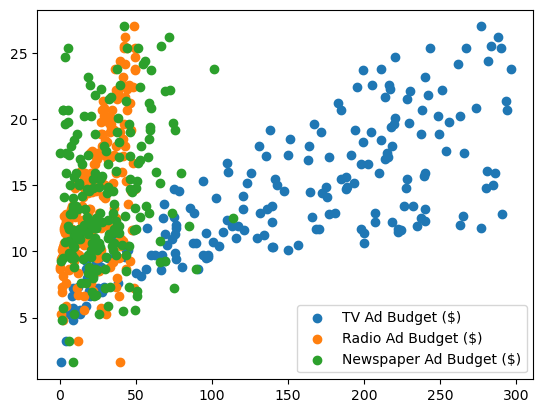

In [2]:
df = pd.read_csv('ads.csv', index_col=0)
print(df)

factors = df.drop('Sales ($)', axis=1)
for factor in factors:
    plt.scatter(x=factor, y='Sales ($)',
                data=df, label=factor)
plt.legend()
plt.show()

# Regression

Since the data contains seems to be mostly linear, we first try linear regression.

But, for convenience sake later, we build a general regression model.

Overall
Mean squared error:  2.146454353686355
R2 score:  0.9296463031996993 



Newspaper
Mean squared error:  33.057651019938405
R2 score:  -0.01623684427548877


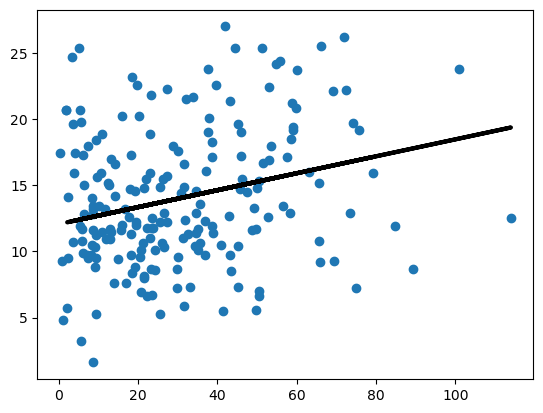

Radio
Mean squared error:  22.39246534834197
R2 score:  0.25523151286587775


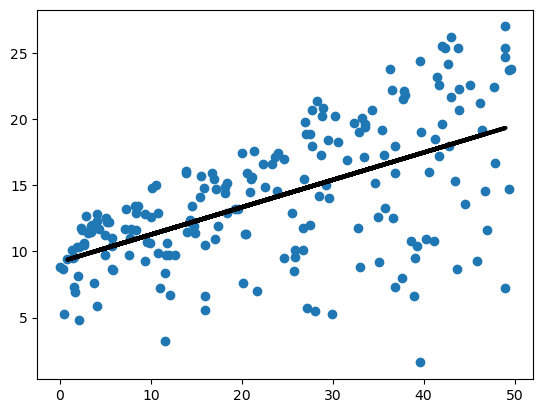

TV
Mean squared error:  11.667978355535016
R2 score:  0.6545316277344876


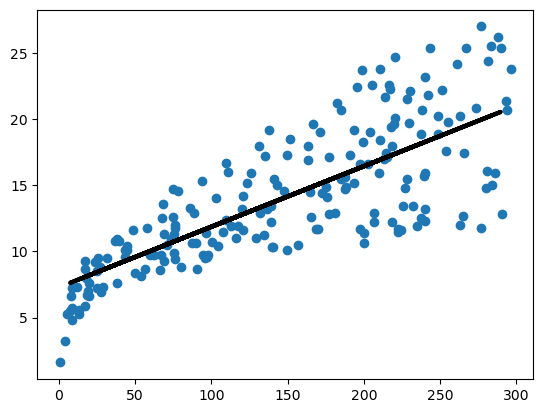

In [3]:
X = factors
y = df['Sales ($)']

def do_regression(model, is_linear_regression=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print("Overall")
    print("Mean squared error: ", mean_squared_error(y_test, predictions))
    print("R2 score: ", r2_score(y_test, predictions), "\n\n\n")

    i = 0
    for factor in np.rot90(X):
        X_train, X_test, y_train, y_test = train_test_split(factor, y, test_size=0.2)
        
        X_train = X_train.reshape(-1, 1)
        X_test = X_test.reshape(-1, 1)
        
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        print(['Newspaper', 'Radio', 'TV'][i])
        print("Mean squared error: ", mean_squared_error(y_test, predictions))
        print("R2 score: ", r2_score(y_test, predictions))
        
        if not is_linear_regression:      
            X_train, y_train = factor, y
            X_test = np.arange(min(X_train), max(X_train), 1)[:, np.newaxis]
            X_train = X_train.reshape(-1, 1)
            X_test = X_test.reshape(-1, 1)
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            
        plt.scatter(factor, y)
        plt.plot(X_test, predictions, color='black', linewidth=3)
        plt.show()
        i+=1
        
do_regression(linear_model.LinearRegression(), is_linear_regression=True)

### Decision tree regression

Overall
Mean squared error:  2.737319961184144
R2 score:  0.8673511975402438 



Newspaper
Mean squared error:  22.026023354915402
R2 score:  -0.08183656148713814


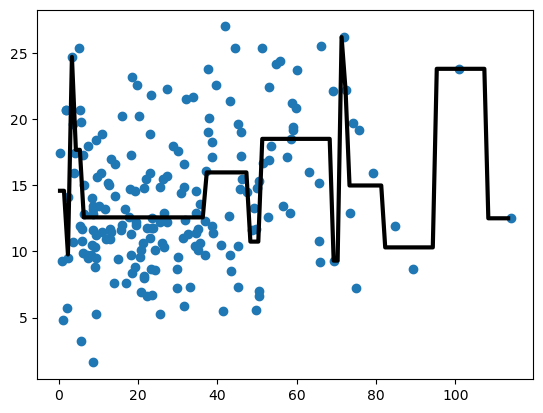

Radio
Mean squared error:  25.906181961473813
R2 score:  0.11008653248529565


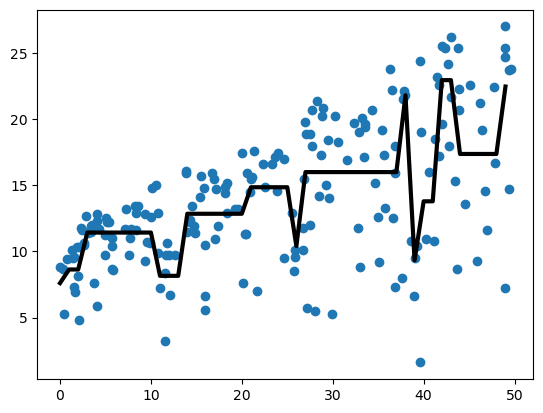

TV
Mean squared error:  12.879561951821717
R2 score:  0.31981479364302434


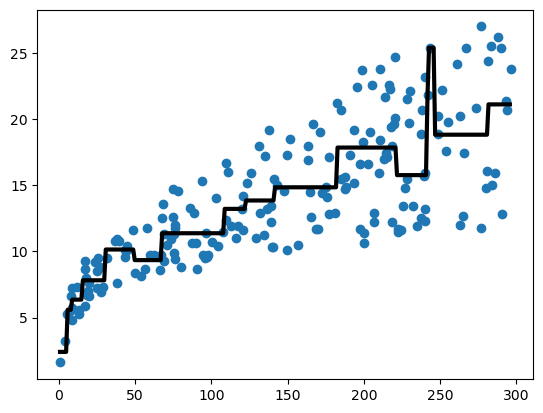

In [4]:
do_regression(tree.DecisionTreeRegressor(max_depth=4))

### Random forest regression

Overall
Mean squared error:  1.0034295529156014
R2 score:  0.9460150054703335 



Newspaper
Mean squared error:  36.04273685378387
R2 score:  -0.03982306041590844


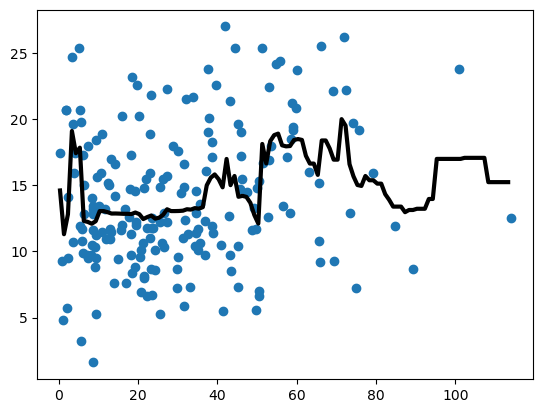

Radio
Mean squared error:  28.312732280662175
R2 score:  0.034428179437592354


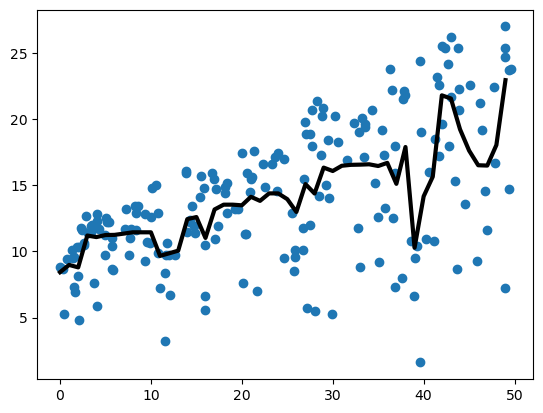

TV
Mean squared error:  13.101668712492778
R2 score:  0.5144336833554556


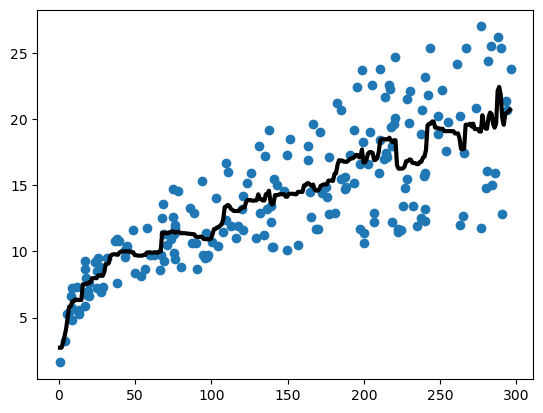

In [5]:
do_regression(ensemble.RandomForestRegressor(random_state=0, max_depth=4))